In [2]:
import numpy as np 
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In /Users/zed/.pyenv/versions/anaconda3-2020.11/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/zed/.pyenv/versions/anaconda3-2020.11/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/zed/.pyenv/versions/anaconda3-2020.11/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/zed/.pyenv/versions/anaconda3-2020.11/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be remove

In [46]:
x1 = np.array([-1.2, -1.6,4,-3,3,2])
x2 = np.array([1.6,2,1,0,-0.8,0])
y = np.array([1,1,-1,1,-1,-1])

In [47]:
x = np.dstack([x1,x2])

In [48]:
x = x.flatten().reshape(-1,2)

In [57]:
def plot_point(x,y,W = [[-0.5,0.25]],b = 0):
    fig = plt.figure(dpi = 200)
    plt.grid(True, linestyle='-.')
    ax = plt.gca()
    ax.set_aspect(1)
    for i in range(len(y)):
        if y[i]==1:
            plt.scatter(x[i][0],x[i][1],marker = "x",c = "r",s = 20)
        else:
            plt.scatter(x[i][0],x[i][1],marker = "o",c = "b",s = 20)
    
    x = np.arange(-4,4,0.01)
    y = (W[0][0]*x+b)/(-1*W[0][1])
    plt.scatter(x,y,c = "black",marker = 'o',s = 1)
    plt.savefig("svm.png")
    plt.show()

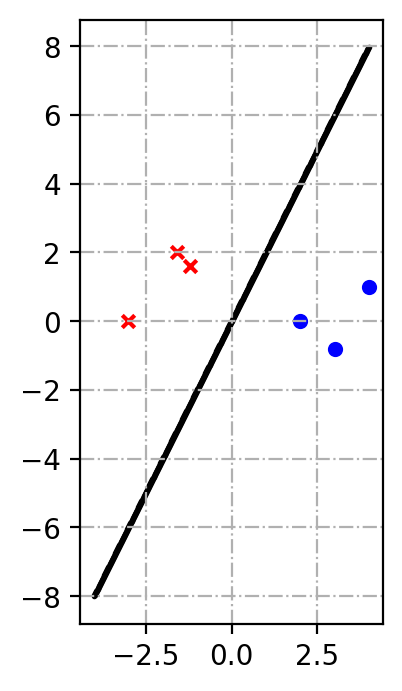

In [58]:
plot_point(x,y)

In [28]:
clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
	    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
	    max_iter=-1, probability=False, random_state=None, shrinking=True,
	    tol=0.001, verbose=False)

clf.fit(x, y) 

#获取模型返回值
n_Support_vector = clf.n_support_#支持向量个数
Support_vector_index = clf.support_#支持向量索引
W = clf.coef_#方向向量W
b =  clf.intercept_#截距项b


In [29]:
x[Support_vector_index]

array([[ 2. ,  0. ],
       [-1.2,  1.6]])

In [30]:
W

array([[-0.49999999,  0.25      ]])

# Decision Tree

In [6]:
from sklearn import tree

In [17]:
data = "0 0 1 1 0 +1 1 1 0 1 0 +1 0 1 1 1 1 +1 0 1 0 0 0 +1 0 1 0 0 0 +1 1 0 1 1 1 -1 0 0 1 0 0 -1 1 0 0 0 0 -1 1 0 1 1 0 -1 1 1 1 1 1 +1"

In [18]:
data.replace(" ",",")

'0,0,1,1,0,+1,1,1,0,1,0,+1,0,1,1,1,1,+1,0,1,0,0,0,+1,0,1,0,0,0,+1,1,0,1,1,1,-1,0,0,1,0,0,-1,1,0,0,0,0,-1,1,0,1,1,0,-1,1,1,1,1,1,+1'

In [19]:
f = open('data.txt','a')
f.write(data)
f.close()

In [20]:
data = np.loadtxt('data.txt')

In [21]:
data  = data.reshape(-1,6)

In [30]:
data 

array([[ 0.,  0.,  1.,  1.,  0.,  1.],
       [ 1.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  1.,  1.,  1., -1.],
       [ 0.,  0.,  1.,  0.,  0., -1.],
       [ 1.,  0.,  0.,  0.,  0., -1.],
       [ 1.,  0.,  1.,  1.,  0., -1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.]])

In [22]:
x = data[:,:-1]

In [23]:
y = data[:,-1]

In [108]:
clf = tree.DecisionTreeClassifier(criterion = "entropy",max_depth=5,)
clf = clf.fit(x, y)

In [109]:
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [110]:
import pydotplus

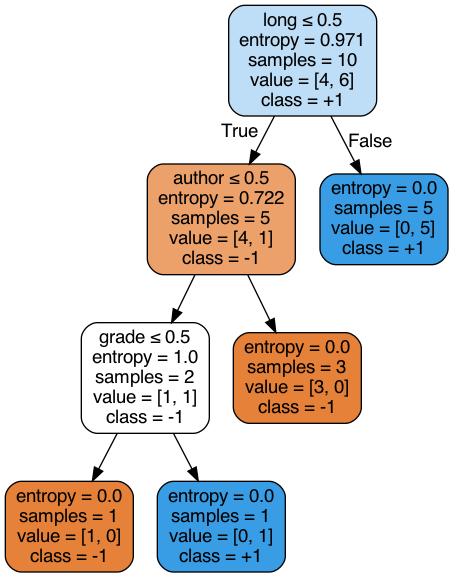

In [114]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['author','long','research','grade','lottery'],  
                         class_names=['-1','+1'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [115]:
clf.feature_importances_


array([0.16577985, 0.62823644, 0.        , 0.2059837 , 0.        ])

In [113]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [127]:
#计算数据集信息熵
def dataset_entropy(dataset):
    """
    计算数据集信息熵
    :param dataset:
    :return:  熵值
    """
    classLabel = dataset[:,-1]
    labelCount = {}
    #计算类别个数
    for i in range(classLabel.size):
        label = classLabel[i]
        labelCount[label]=labelCount.get(label,0)+1
    #计算熵值
    ent=0
    for k,v in labelCount.items():
        ent += -v/classLabel.size*np.log2(v/classLabel.size)
    return ent

#划分子集
def splitDataSet(dataset,featureIndex,value):
    #划分后的子集
    subdataset = []
    for example in dataset:
        if example[featureIndex]==value:
            subdataset.append(example)
    return np.delete(subdataset,featureIndex,axis=1)
#选择最优分类属性
def chooseBestFeature(dataset,labels):
    #特征的个数
    featureNum = labels.size
    #最小熵值
    minEntropy,bestFeatureIndex=1,None
    #样本的总数
    n = dataset.shape[0]
    for i in range(featureNum):
        #指定特征的条件熵
        featureEntropy =0
        #返回所有子集
        featureList = dataset[:, i]
        featureValues = set(featureList)
        for value in featureValues:
            subDataSet = splitDataSet(dataset,i,value)
            featureEntropy+=subDataSet.shape[0]/n*dataset_entropy(subDataSet)
        if minEntropy>featureEntropy:
            minEntropy = featureEntropy
            bestFeatureIndex = i
    print(minEntropy)
    print(bestFeatureIndex)
    return bestFeatureIndex

In [128]:
#为空时选择的最大类别
def mayorClass(classList):
    labelCount = {}
    for i in range(classList.size):
        label = classList[i]
        labelCount[label] = labelCount.get(label, 0) + 1
    sortedLabel = sorted(labelCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedLabel[0][0]
#建树
def createTree(dataset,labels):
    #如果样本全部属于同一个类别
    classList = dataset[:,-1]
    if len(set(classList))==1:
        return dataset[:,-1][0]
    #如果A=空
    if labels.size==0:
        return mayorClass(classList)

    bestFeatureIndex = chooseBestFeature(dataset,labels)
    bestFeature = labels[bestFeatureIndex]
    dtree = {bestFeature:{}}
    featureList = dataset[:,bestFeatureIndex]
    featureValues = set(featureList)
    for value in featureValues:
        subdataset = splitDataSet(dataset,bestFeatureIndex,value)
        sublabels = np.delete(labels,bestFeatureIndex)
        dtree[bestFeature][value]=createTree(subdataset,sublabels)
    return dtree

In [129]:
#预测单个
def predict(tree,labels,testData):
    rootName = list(tree.keys())[0]
    rootValue = tree[rootName]
    featureIndex = list(labels).index(rootName)
    classLabel = None
    for key in rootValue.keys():
        if testData[featureIndex] == int(key):
            if type(rootValue[key]).__name__=="dict":
                classLabel = predict(rootValue[key],labels,testData)
            else:
                classLabel = rootValue[key]
    return classLabel
#预测全部
def predictAll(tree,labels,testSet):
    classLabels = []
    for i in testSet:
        classLabels.append(predict(tree,labels,i))
    return classLabels

In [130]:
tree = createTree(data, np.array(["author",'long','research','grade','lottery']))
# testSet = createTestSet()
# print(predictAll(tree, labels, testSet))
print(tree) 

0.36096404744368116
1
0.4
0
0.0
1
{'long': {0.0: {'author': {0.0: {'grade': {0.0: -1.0, 1.0: 1.0}}, 1.0: -1.0}}, 1.0: 1.0}}


In [122]:
import matplotlib.pyplot as plt

decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction', \
                            xytext=centerPt, textcoords='axes fraction', \
                            va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)

def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = getTreeDepth(secondDict[key]) + 1
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString)

def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalw, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalw
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalw = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalw
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()

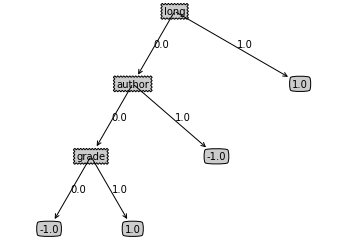

In [124]:
createPlot(tree)

In [125]:
tree.items()

dict_items([('long', {0.0: {'author': {0.0: {'grade': {0.0: -1.0, 1.0: 1.0}}, 1.0: -1.0}}, 1.0: 1.0})])

In [126]:
dataset_entropy(data)

0.9709505944546686

In [24]:
#定义计算熵的函数
def ent(data):
    prob1 = pd.value_counts(data) / len(data)
    return sum(np.log2(prob1) * prob1 * (-1))
 
 
#定义计算信息增益的函数
def gain(data,str1,str2):
    e1 = data.groupby(str1).apply(lambda x:ent(x[str2]))
    p1 = pd.value_counts(data[str1]) / len(data[str1])
    e2 = sum(e1 * p1)
    return ent(data[str2]) - e2
 
 
#测试


In [28]:
df = pd.DataFrame(data )
df 

,0,1,2,3,4,5
0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,1.0,0.0,1.0,0.0,1.0
2,0.0,1.0,1.0,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0
5,1.0,0.0,1.0,1.0,1.0,-1.0
6,0.0,0.0,1.0,0.0,0.0,-1.0
7,1.0,0.0,0.0,0.0,0.0,-1.0
8,1.0,0.0,1.0,1.0,0.0,-1.0
9,1.0,1.0,1.0,1.0,1.0,1.0


In [35]:
df.columns = ["author","long","research","grade","lottery","spam"]

In [36]:
df 

,author,long,research,grade,lottery,spam
0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,1.0,0.0,1.0,0.0,1.0
2,0.0,1.0,1.0,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0
5,1.0,0.0,1.0,1.0,1.0,-1.0
6,0.0,0.0,1.0,0.0,0.0,-1.0
7,1.0,0.0,0.0,0.0,0.0,-1.0
8,1.0,0.0,1.0,1.0,0.0,-1.0
9,1.0,1.0,1.0,1.0,1.0,1.0


In [43]:
gain(df,"research","grade")

0.256425891682003

In [44]:
x = [1,4,8,5,3,7,10,4,4,8]
y = [10,4,7,6,16,7,14,2,10,8]
label = [0,0,1,0,0,1,1,0,1,0]
df = pd.DataFrame({"x":x,"y":y,"label":label})

In [45]:
df

,x,y,label
0,1,10,0
1,4,4,0
2,8,7,1
3,5,6,0
4,3,16,0
5,7,7,1
6,10,14,1
7,4,2,0
8,4,10,1
9,8,8,0
